# European Club data - Analysis of goals

In [1]:
## our packaged code
from src import utilities

In [2]:
## suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [28]:
import pandas as pd

In [3]:
## visualisation
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")

import seaborn as sns
# sns.set()
sns.set(rc={'figure.figsize':(10, 5)})

# from mpl_toolkits.basemap import Basemap

In [4]:
df = utilities.get_master("fulldata")

df = df[df.HomeAway == "Home"]

attrib_cols = ["HomeAway", "Season", "Country", "Tier", "Team", "TeamOpp", "Manager", "ManagerOpp", 
               "Stadium", "Referee", "Latitude", "Longitude"]
metric_cols = ["Goals", "GoalsOpp", "TotalGoals"]

df = df[attrib_cols + metric_cols]

df.shape

(203196, 15)

In [5]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
HomeAway,203196,1,Home,203196,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Season,203196,28,2018-2019,10224,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,203196,11,England,74934,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tier,203196,NaN,NaN,NaN,1.90273,1.13008,1,1,2,2,5
Team,203196,785,Watford,2258,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TeamOpp,203196,776,Watford,2233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Manager,23605,164,Bryan Robson,679,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ManagerOpp,23607,163,Bryan Robson,683,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stadium,101087,181,Vicarage Road,2258,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Referee,70696,1314,M Atkinson,1191,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
mean = df.TotalGoals.mean()
std = df.TotalGoals.std()
low = mean - std
high = mean + std

mean, std, low, high

(2.6246198214514207, 1.6572290068030844, 0.9673908146483363, 4.281848828254505)

## Overall Trends

array([[<AxesSubplot:title={'center':'TotalGoals'}>]], dtype=object)

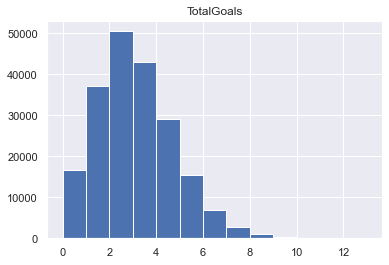

In [6]:
df.hist(column="TotalGoals", bins=range(int(df.TotalGoals.max()+1)))


#######

          TotalGoals                                              
               count      mean       std  min  25%  50%  75%   max
Season                                                            
1993-1994     3346.0  2.643455  1.699524  0.0  1.0  2.0  4.0  11.0
1994-1995     4617.0  2.690492  1.718282  0.0  1.0  2.0  4.0  10.0
1995-1996     5103.0  2.658828  1.694471  0.0  1.0  2.0  4.0  11.0
1996-1997     5981.0  2.587862  1.702795  0.0  1.0  2.0  4.0  13.0
1997-1998     6733.0  2.624981  1.725868  0.0  1.0  2.0  4.0  11.0
1998-1999     6531.0  2.629613  1.682949  0.0  1.0  2.0  4.0  10.0
1999-2000     6532.0  2.657226  1.701303  0.0  1.0  2.0  4.0  12.0
2000-2001     6553.0  2.684725  1.694666  0.0  1.0  2.0  4.0  10.0
2001-2002     6473.0  2.662753  1.697212  0.0  1.0  2.0  4.0  11.0
2002-2003     4391.0  2.599408  1.655140  0.0  1.0  2.0  4.0  10.0
2003-2004     5267.0  2.644959  1.670326  0.0  1.0  2.0  4.0  10.0
2004-2005     5644.0  2.576187  1.665243  0.0  1.0  

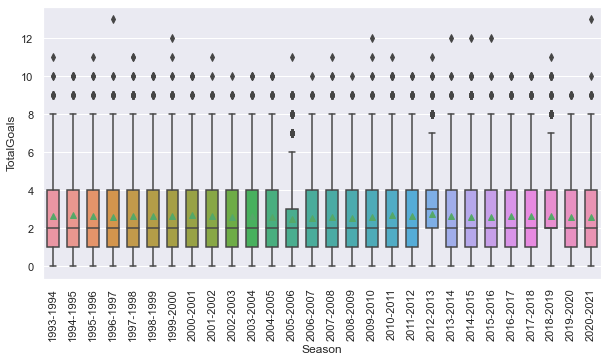


#######

         TotalGoals                                              
              count      mean       std  min  25%  50%  75%   max
Country                                                          
Belgium      6669.0  2.881841  1.739864  0.0  2.0  3.0  4.0  12.0
England     74934.0  2.601129  1.625235  0.0  1.0  2.0  4.0  11.0
France      18216.0  2.360507  1.561539  0.0  1.0  2.0  3.0  11.0
Germany     16143.0  2.809267  1.711031  0.0  2.0  3.0  4.0  13.0
Greece       6675.0  2.491536  1.635512  0.0  1.0  2.0  3.0  10.0
Holland      7989.0  3.075354  1.777518  0.0  2.0  3.0  4.0  13.0
Italy       18589.0  2.533541  1.626860  0.0  1.0  2.0  4.0  10.0
Portugal     7243.0  2.502692  1.614398  0.0  1.0  2.0  4.0  10.0
Scotland    17917.0  2.786069  1.690613  0.0  2.0  3.0  4.0  12.0
Spain       20992.0  2.510194  1.644387  0.0  1.0  2.0  3.0  12.0
Turkey       7827.0  2.784081  1.747149  0.0  2.0  3.0  4.0  11.0


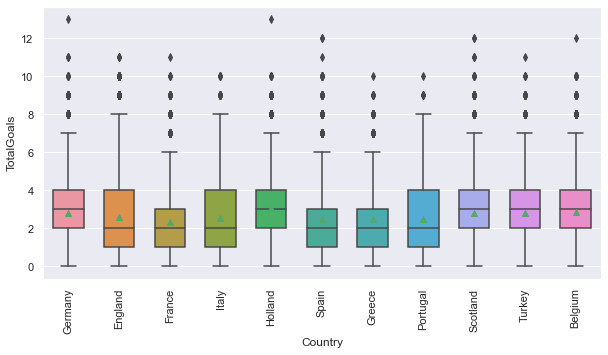


#######

     TotalGoals                                              
          count      mean       std  min  25%  50%  75%   max
Tier                                                         
1       97874.0  2.687813  1.686063  0.0  1.0  3.0  4.0  13.0
2       61774.0  2.499595  1.611747  0.0  1.0  2.0  3.0  13.0
3       17129.0  2.683052  1.634595  0.0  2.0  3.0  4.0  11.0
4       18268.0  2.628914  1.645041  0.0  1.0  2.0  4.0  11.0
5        8149.0  2.680942  1.669430  0.0  1.0  2.0  4.0  10.0


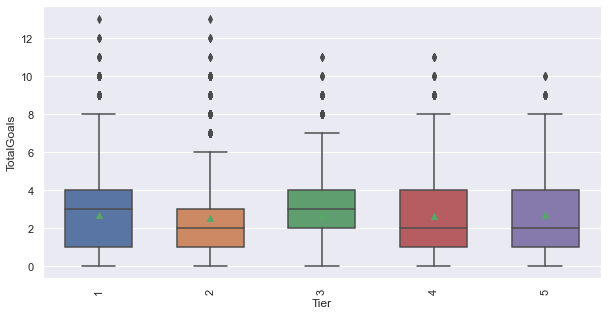

In [56]:
for col in ["Season", "Country", "Tier"]:
    print("\n#######\n")
    GpG = df[[col, "TotalGoals"]].groupby(col)
    print(GpG.describe(include="all"))
#     df[[col, "TotalGoals"]].boxplot(by=col, showmeans=True, widths=0.7, figsize=(10,5)).get_figure().gca().set_title("")
    sns.boxplot(x=col, y="TotalGoals", data=df, showmeans=True, width=0.6)
    plt.xticks(rotation=90)
    plt.show()
    

## Most and Fewest Goals


#######

Top 10 average goals by Team (minimum 50 matches)...
Team
PSV Eindhoven       3.583710
Ajax                3.542986
Barcelona           3.509690
Real Madrid         3.497099
Alfreton Town       3.456522
Bayern Munich       3.423841
Sparta Rotterdam    3.326923
Gretna              3.322222
Go Ahead Eagles     3.274510
Feyenoord           3.272523
Name: TotalGoals, dtype: float64


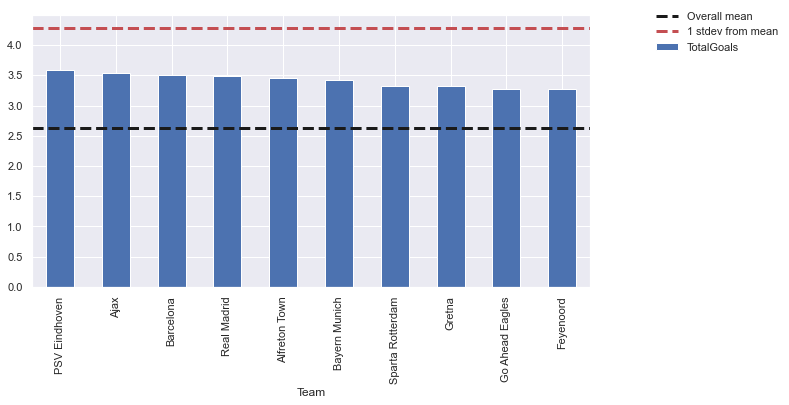

Bottom 10 average goals by Team (minimum 50 matches)...
Team
Reus Deportiu    1.587302
Badajoz          1.871212
Lamia            1.905660
Reggiana         1.946237
Paris FC         1.986842
Giannina         1.987342
Monza            2.012500
Louhans-Cuis.    2.016393
Latina           2.023810
Pisa             2.035294
Name: TotalGoals, dtype: float64


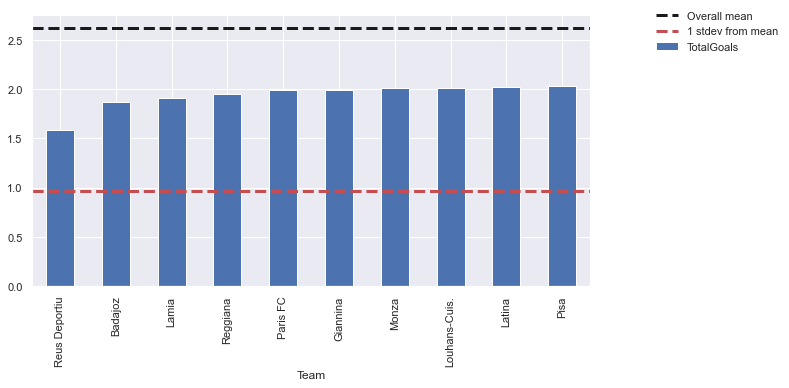


#######

Top 10 average goals by TeamOpp (minimum 50 matches)...
TeamOpp
Kayseri           3.529412
Roosendaal        3.514286
MVV Maastricht    3.494118
Roda              3.470588
Elazigspor        3.385965
Holstein Kiel     3.345455
Heerenveen        3.314607
Ajax              3.308390
Gretna            3.300000
Sparta            3.278481
Name: TotalGoals, dtype: float64


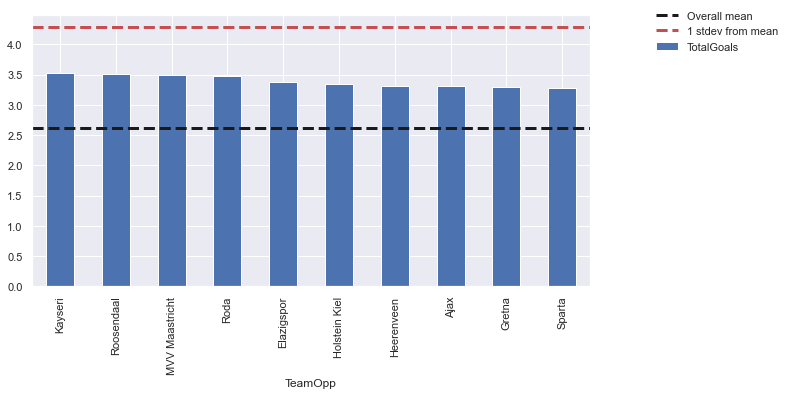

Bottom 10 average goals by TeamOpp (minimum 50 matches)...
TeamOpp
Reus Deportiu    1.539683
Badajoz          1.931818
Wasquehal        2.000000
Red Star         2.000000
Merida           2.039604
Latina           2.047619
Jaen             2.060976
Beauvais         2.066038
Paris FC         2.076923
Lugo             2.096591
Name: TotalGoals, dtype: float64


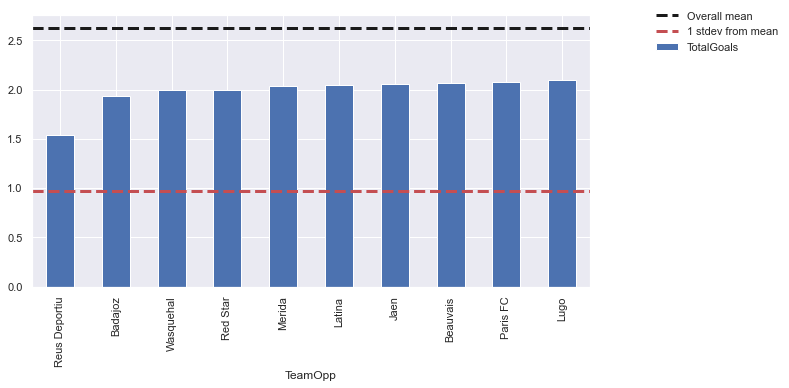


#######

Top 10 average goals by Manager (minimum 50 matches)...
Manager
Unai Emery           3.500000
Dean Smith §         3.211268
André Villas-Boas    3.184953
Kit Symons           3.106977
Claudio Ranieri      3.067416
Dean Smith           3.063584
Stewart Houston      3.035494
Rafael Benítez       2.974895
Peter Grant          2.961111
Mark Hughes          2.958333
Name: TotalGoals, dtype: float64


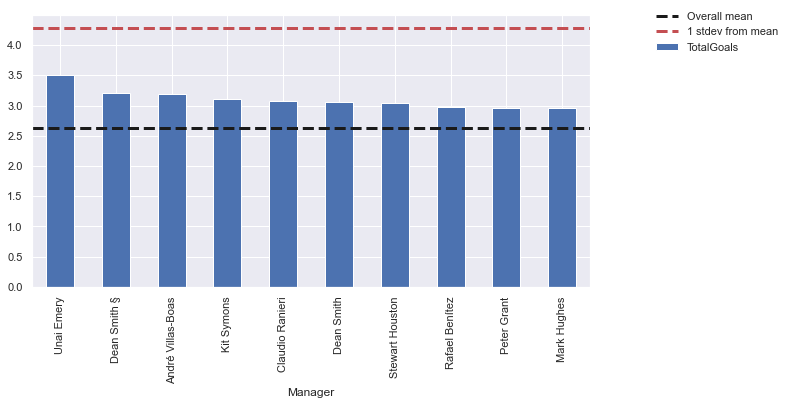

Bottom 10 average goals by Manager (minimum 50 matches)...
Manager
Steve Agnew          1.862069
Tony Pulis           1.987500
Aitor Karanka        2.009615
José Morais          2.140000
Gordon Strachan      2.142857
Roy Hodgson          2.146199
David O'Leary        2.214286
Sean Dyche §         2.275735
José Manuel Gomes    2.301370
Lennie Lawrence      2.304833
Name: TotalGoals, dtype: float64


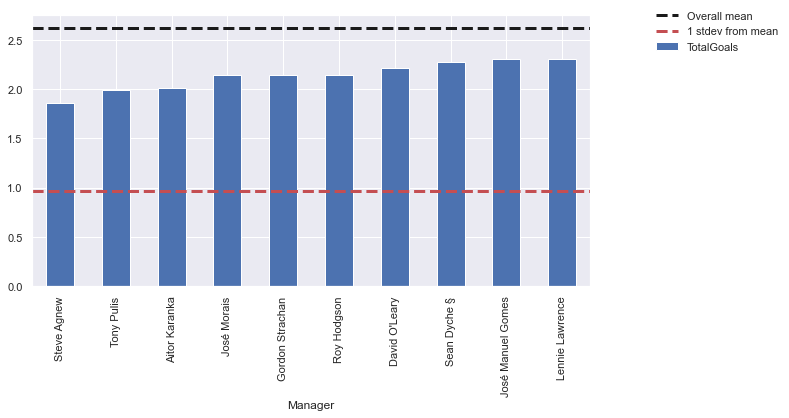


#######

Top 10 average goals by ManagerOpp (minimum 50 matches)...
ManagerOpp
Malky Mackay         3.603774
Unai Emery           3.392157
Jaap Stam            3.380952
Eddie Howe           3.008357
Joe Kinnear          2.985149
Iain Dowie           2.944444
André Villas-Boas    2.913183
Nigel Adkins         2.907563
Rafael Benítez       2.858896
John Gorman          2.851175
Name: TotalGoals, dtype: float64


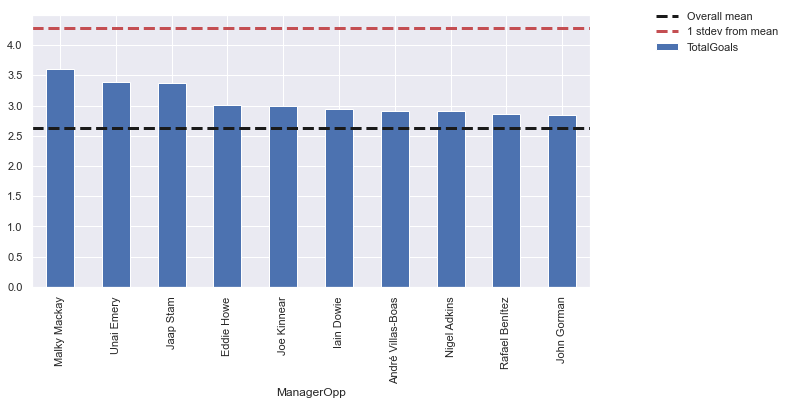

Bottom 10 average goals by ManagerOpp (minimum 50 matches)...
ManagerOpp
Brian Little         2.112903
Aitor Karanka        2.121951
Steve McClaren       2.185185
Roy Hodgson          2.215569
Dougie Freedman      2.216667
Ronald Koeman        2.235849
Thomas Frank         2.265823
José Manuel Gomes    2.267606
Paul Clement         2.285714
Gary Johnson         2.333333
Name: TotalGoals, dtype: float64


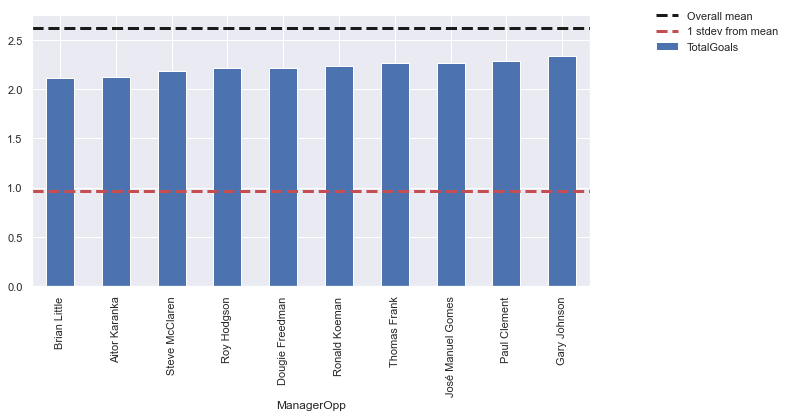


#######

Top 10 average goals by Stadium (minimum 50 matches)...
Stadium
Camp Nou               3.509690
Santiago Bernabéu      3.497099
Allianz Arena          3.423841
Weserstadion           3.131868
BayArena               3.131579
Galabank               3.116279
Etihad Stadium         3.099398
Celtic Park            3.091880
Ibrox Stadium          3.086393
Rhein-Neckar Arena     3.071111
Name: TotalGoals, dtype: float64


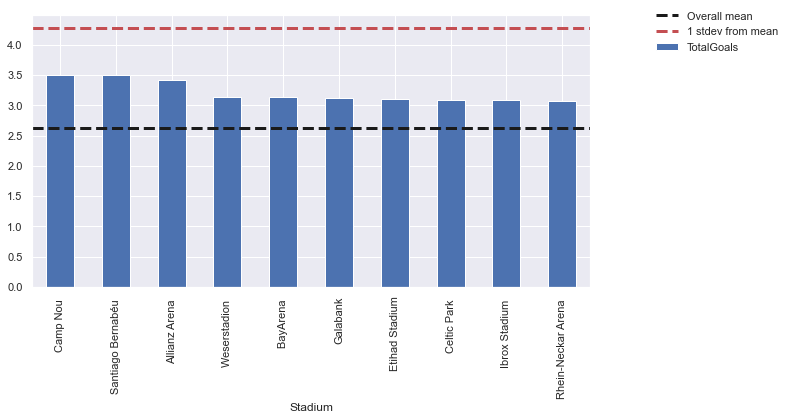

Bottom 10 average goals by Stadium (minimum 50 matches)...
Stadium
Stade François Coty       2.148241
Allianz Riviera           2.205821
Stadium Municipal         2.210648
Stade Marcel Picot        2.278960
Riverside Stadium         2.280193
Stade Francis-Le Blé      2.282895
Stade de la Beaujoire     2.286307
Oakwell                   2.291667
Stade du Roudourou        2.296296
Liberty Stadium           2.314204
Name: TotalGoals, dtype: float64


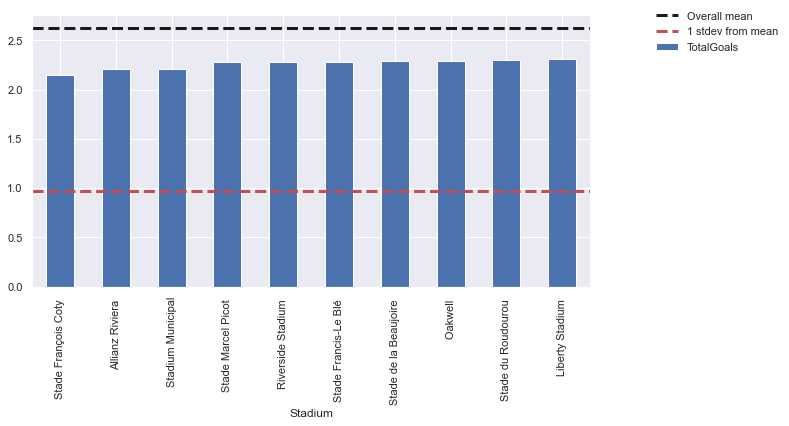


#######

Top 10 average goals by Referee (minimum 50 matches)...
Referee
G Beaton        3.482759
J Oldham        3.372549
A Freeland      3.267857
G Ross          3.242424
J Whiteley      3.137255
F Graham        3.127329
D Richardson    3.080645
R Whitton       3.055172
D England       3.042105
C Napier        3.029851
Name: TotalGoals, dtype: float64


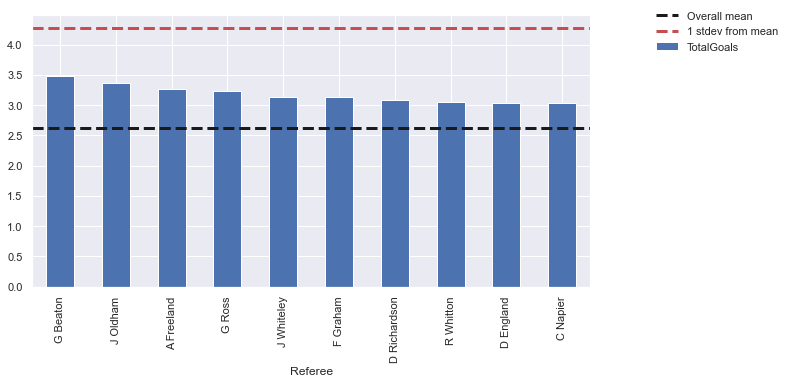

Bottom 10 average goals by Referee (minimum 50 matches)...
Referee
O Yates        2.097744
A Young        2.142857
E Smith        2.200000
D Treleaven    2.215385
S Finnie       2.219048
K Johnson      2.219512
M Fletcher     2.226667
M Edwards      2.229508
G Ward         2.233393
C Berry        2.250000
Name: TotalGoals, dtype: float64


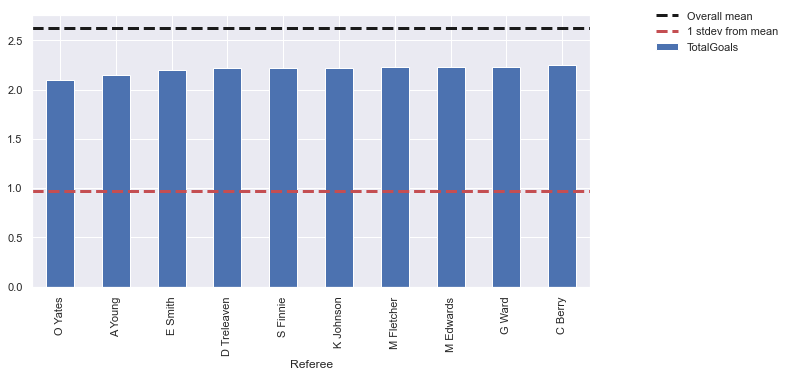

In [71]:
min_games = 50
top_n = 10

for col in ["Team", "TeamOpp", "Manager", "ManagerOpp", "Stadium", "Referee"]:
    print("\n#######\n")
    for txt, asc, hilo in [("Top", False, high), ("Bottom", True, low)]:
        print("{0} {1} average goals by {2} (minimum {3} matches)...".format(txt, top_n, col, min_games))
        top = df[df[col].isin(df[col].value_counts()[df[col].value_counts() > min_games].index)].groupby(col).TotalGoals
        top = top.mean().sort_values(ascending=asc).head(top_n)
        print(top)
        top.plot(kind="bar", figsize=(10,5))
        plt.xticks(rotation=90)
        plt.axhline(y=mean, linewidth=3, color='k', linestyle="--", label="Overall mean")
        plt.axhline(y=hilo, linewidth=3, color='r', linestyle="--", label="1 stdev from mean")
        plt.legend(bbox_to_anchor=(1.1, 1.05))
        plt.show()
    

In [39]:
for col in ["Manager", "ManagerOpp", "Stadium", "Referee", "Latitude", "Longitude"]:
    for att in ["Country", "Tier"]:
        print("\n#######\n")
        print("Available {0} matches by {1}".format(col, att))
        print(df.loc[pd.notnull(df[col]), att].value_counts().sort_index())



#######

Available Manager matches by Country
England    23605
Name: Country, dtype: int64

#######

Available Manager matches by Tier
1    11215
2     9467
3     2379
4      544
Name: Tier, dtype: int64

#######

Available ManagerOpp matches by Country
England    23607
Name: Country, dtype: int64

#######

Available ManagerOpp matches by Tier
1    11206
2     9486
3     2371
4      544
Name: Tier, dtype: int64

#######

Available Stadium matches by Country
England     57702
France      10924
Germany      9167
Scotland    11564
Spain       11730
Name: Country, dtype: int64

#######

Available Stadium matches by Tier
1    47235
2    31967
3    12087
4     8793
5     1005
Name: Tier, dtype: int64

#######

Available Referee matches by Country
England     61965
Germany      1219
Italy         760
Scotland     6752
Name: Country, dtype: int64

#######

Available Referee matches by Tier
1    21506
2    19009
3    11321
4    11284
5     7576
Name: Tier, dtype: int64

#######

Available Lati

## Mapping Goals

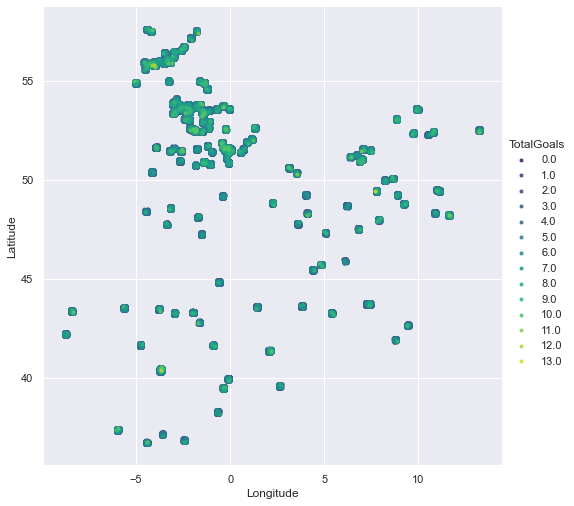

In [92]:
mapdata=df.dropna(subset=['Latitude', 'Longitude', 'TotalGoals'])
# mapdata = df.dropna(subset=['Latitude', 'Longitude', 'TotalGoals']).groupby(['Latitude', 'Longitude']).TotalGoals\
#     .mean().reset_index()
# fg = sns.FacetGrid(data=mapdata, hue='Country', height=6, aspect=.9)
# fg.map(plt.scatter, 'Longitude', 'Latitude').add_legend()

sns.lmplot(x='Longitude', y='Latitude', hue='TotalGoals', data=mapdata, fit_reg=False, 
           x_jitter=0.1, y_jitter=0.1, markers=".", palette="viridis", height=7) 

In [10]:
# # Extract the data we're interested in
# lat = df.groupby(['Stadium'])[["Latitude"]].max().values
# lon = df.groupby(['Stadium'])[["Longitude"]].max().values

# # print lat, lon

# # 1. Draw the map background
# fig = plt.figure(figsize=(8, 8))
# m = Basemap(projection='lcc', resolution='h', 
#             lat_0=46., lon_0=-3.,
#             width=3E6, height=3E6)
# m.shadedrelief()
# m.drawcoastlines(color='gray')
# m.drawcountries(color='black')

# # 2. scatter stadium data
# m.scatter(lon, lat, latlon=True,
#           color='r', s=40,
#           alpha=0.5)
